# **<center> Introduction to Python for Practical Problems </center>**
# **<center> New Economic School, MAE 2025 </center>**
## **<center> Home Assignment 4 </center>**

# Data Visualization

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import yfinance as yf

import warnings
warnings.simplefilter("ignore")

В этом домашнем задании вам потребуется визуализировать данные, с которыми вы работали в прошлом домашнем задании. Возможно, удобно будет в самом начале смерджить все таблицы. 

Оформление графиков зависит только от вас. Если вы захотите поменять стиль графика в `matplotlib.pyplot`, то вам для этого может пригодиться обращение `plt.style.use()`, куда в качестве аргумента нужно передать название стиля. Варианты оформления можете посмотреть [тут](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).

Пожалуйста, не забывайте делать графики читабельными - добавляйте легенду, подписи осей и заголовки.

Описание полей в данных:

* ID - an Id that represents a (Shop, Item) tuple within the test set
* shop_id - unique identifier of a shop
* item_id - unique identifier of a product
* category_id - unique identifier of category
* item_cnt_day - number of products sold. 
* item_price - current price of an item
* date - date in format dd/mm/yyyy
* date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,…, October 2015 is 33
* item_name - name of item
* shop_name - name of shop
* category_name - name of category

In [2]:
sales = pd.read_csv(\
    "C:/Users/Popov/Documents/NES_studies/Python/Elementary python/HA/HA 4 datasets/sales.csv")
shops = pd.read_csv(\
    "C:/Users/Popov/Documents/NES_studies/Python/Elementary python/HA/HA 4 datasets/shops.csv")
items = pd.read_csv(\
    "C:/Users/Popov/Documents/NES_studies/Python/Elementary python/HA/HA 4 datasets/items.csv")
item_categories = pd.read_csv(\
    "C:/Users/Popov/Documents/NES_studies/Python/Elementary python/HA/HA 4 datasets/item_categories.csv")

In [3]:
data = pd.merge(sales, shops, on='shop_id', how = "inner")
data = pd.merge(data, items, on='item_id', how = "inner")
data = pd.merge(data, item_categories, on='category_id', how = "inner")

In [4]:
data.sample()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,category_id,category_name
2545020,18.03.2015,26,25,13697,899.0,1.0,"Moscow TEC"" Atrium """,Mug of WOT Warrior Ceramic 425ml (101521),69,Gifts - Souvenirs


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
 6   shop_name       object 
 7   item_name       object 
 8   category_id     int64  
 9   category_name   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 224.0+ MB


date is not in the datetime format

In [6]:
import sys

path = 'C:/Users/Popov/Documents/NES_studies/Python/NES_Helper' # path of the modul
sys.path.append(path)

from NES_helper import Col_dt

In [7]:
data = Col_dt(data, 'date', '%d.%m.%Y')
data = data.col_dt()

In [8]:
data['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2935849 entries, 0 to 2935848
Series name: date
Non-Null Count    Dtype         
--------------    -----         
2935849 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 22.4 MB


success!

### Задание 1.

Постройте гистограмму, отображающую распределение средних во времени цен айтемов (не забудьте перед этим как-то аггрегировать данные).

In [9]:
mean_item_p = \
data.groupby(['date'])['item_price'].mean().reset_index(name = "m_price")
mean_item_p.sample(2)

,date,m_price
565,2014-07-20,771.272440
317,2013-11-14,769.908658


In [10]:
mean_item_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     1034 non-null   datetime64[ns]
 1   m_price  1034 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 16.3 KB


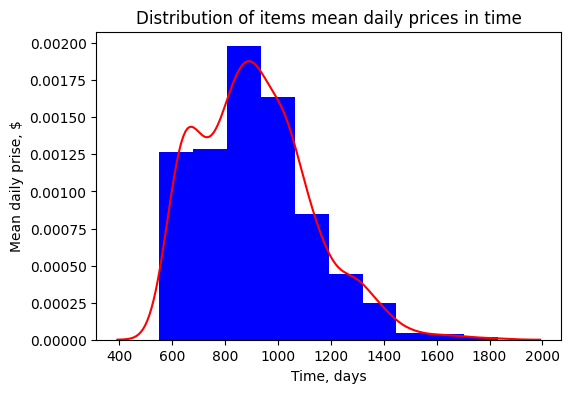

In [11]:
fig = plt.figure(figsize=(6,4))

sns.distplot(x = mean_item_p['m_price'], a = mean_item_p['date'], bins=10, color='red', kde=True, hist=True, hist_kws={'color': 'blue', 'alpha': 1})

plt.xlabel('Time, days')
plt.ylabel('Mean daily prise, $')

plt.title('Distribution of items mean daily prices in time')

None

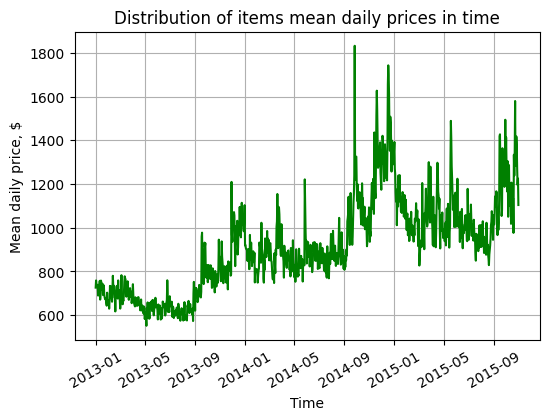

In [12]:
# alternative wat via plt.plot - like time series
plt.figure(figsize=(6, 4))

plt.plot(mean_item_p['date'], mean_item_p['m_price'], color='green')
plt.xlabel('Time')
plt.ylabel('Mean daily price, $')
plt.title('Distribution of items mean daily prices in time')

plt.grid(True)
plt.xticks(rotation=30)
plt.show()

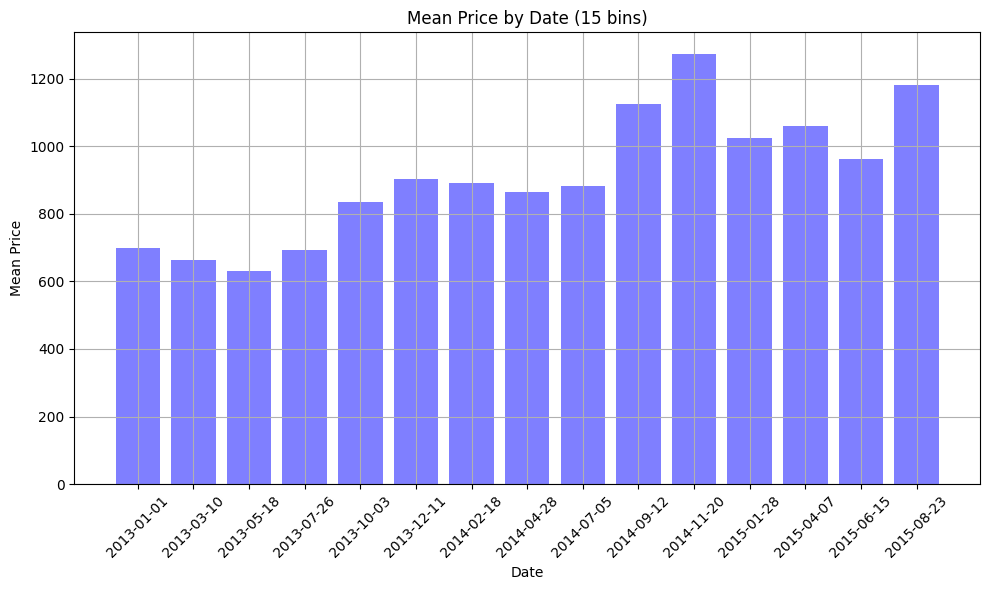

In [13]:
# Extracting just the days from the date values
mean_item_p['date_day'] = mean_item_p['date'].dt.date

# Calculate the range of dates
date_min = mean_item_p['date_day'].min()
date_max = mean_item_p['date_day'].max()

# Convert bins to datetime.date objects
bins = pd.date_range(start=date_min, end=date_max, periods=16).date

# Convert bins to string format
bin_labels = [str(b) for b in bins[:-1]]

# Grouping by date and computing mean price
mean_price_by_date = mean_item_p.groupby(pd.cut(mean_item_p['date_day'], bins=bins, labels=bin_labels))['m_price'].mean()

# Plotting using plt.bar
plt.figure(figsize=(10, 6))
plt.bar(bin_labels, mean_price_by_date.values, color='blue', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.title('Mean Price by Date (15 bins)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()


### Задание 2.

Постройте столбчатую диаграмму (я бы присмотрелся в этом задании к горизонтальному варианту столбчатой диаграммы), которая бы отображала рейтинг магазинов по объему продаж (количество айтемов или объем выручки, на ваше усмотрение) за весь временной промежуток.

In [14]:
data['rev'] = data["item_price"] * data["item_cnt_day"]
total_revenue = data.groupby(['shop_name'])['rev'].sum().reset_index(name = "t_rev")
total_revenue.set_index('shop_name', inplace=True)
total_revenue = total_revenue.sort_values(by = 't_rev', ascending = False)
total_revenue.sample(3)

,t_rev
shop_name,
"Yakutsk TC"" Central """,6.873762e+07
Sergiev Posad 7Ya shopping center,7.418932e+07
"Volga TC ""Volga Mall""",4.053965e+07


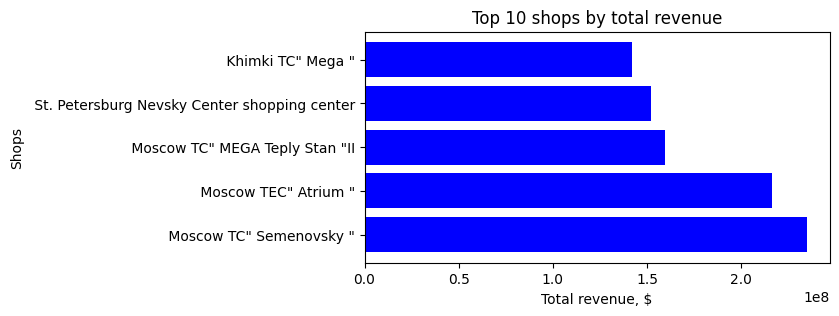

In [15]:
fig = plt.figure(figsize=(6,3))

plt.barh(total_revenue.index[0:5], total_revenue['t_rev'][0:5], color='blue') # Здесь обязательно указывать данны по обеим осям

plt.ylabel('Shops', fontsize=10)
plt.xlabel('Total revenue, $', fontsize=10)

plt.title('Top 10 shops by total revenue')

None

### Задание 3.

Воспользовавшись диаграммой рассеивания, проверьте, существует ли связь между ценой айтемов (**item_price**) и объемом их продаж по дням (**item_cnt_day**). Если не хотите захламлять график, можете ограничить временной промежуток.

In [16]:
# Filter data based on conditions
filter_data = \
data[(data['item_price'] <= 6000) & (data['item_cnt_day'] <= 700)]

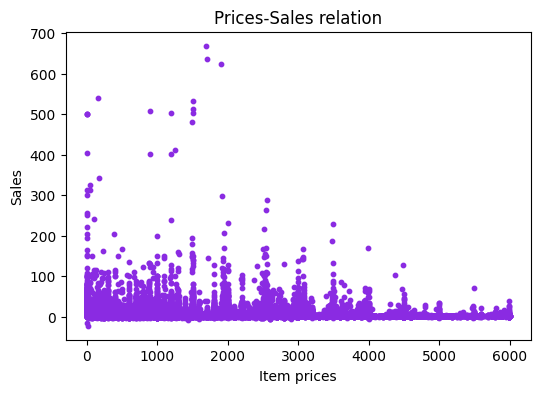

In [17]:
fig = plt.figure(figsize=(6,4))

plt.scatter(x=filter_data['item_price'],
            y=filter_data['item_cnt_day'],
            color='#8A2BE2', s=10) # Аргумент s отвечает за величину маркеров


plt.xlabel('Item prices')
plt.ylabel('Sales')

plt.title('Prices-Sales relation')

None

Well, from the first look of it, they are not really correlated.

### Задание 4.

Воспользовавшись "ящиком с усами", сделайте выводы о средней выручке магазинов (предварительно проделав махинации с таблицей) в зависимости от месяца (можете воспользоваться колонкой **date_block_num**, но я бы посмотрел на вашем месте на то, как в целом от месяца в году зависит выручка). Предположим, что инфляция все 3 года была нулевой.

In [18]:
data['month'] = data['date'].dt.month
data['month'].sample(3)

2611799    5
2410751    1
684989     7
Name: month, dtype: int32

In [19]:
m_revenue = data.groupby(['month'])['rev'].mean().reset_index()

month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

In [20]:
m_revenue['month'] = m_revenue['month'].map(month_names)

m_revenue.set_index('month', inplace=True)
m_revenue.sample(3)

,rev
month,
August,908.363129
January,1018.249426
October,1339.212020


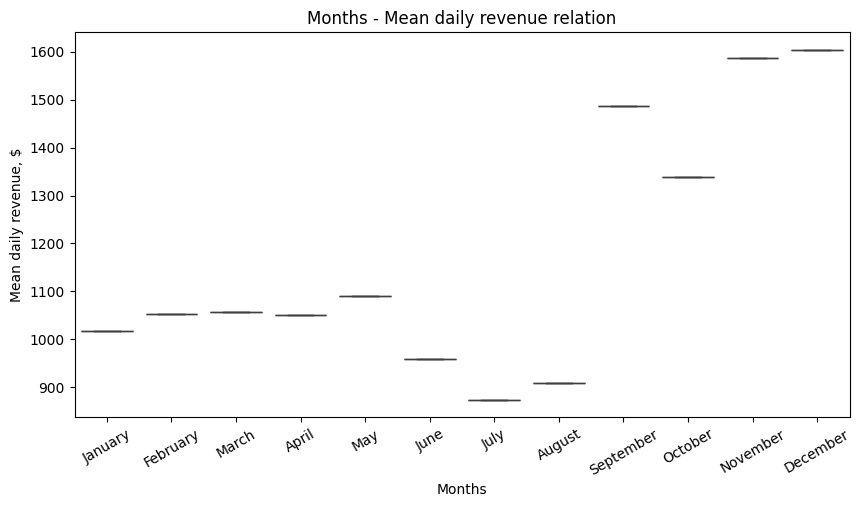

In [21]:
fig = plt.figure(figsize=(10,5))

sns.boxplot(x=m_revenue.index,
            y=m_revenue['rev'])

plt.xlabel('Months')
plt.ylabel('Mean daily revenue, $')

plt.title('Months - Mean daily revenue relation')
plt.xticks(rotation=30)
None

Quite informative, but ugly - cannot even see the mustache)) 

Well, in the autumn sales are higher, as well as in december (Christmas madness). 

### Задание 5.

Воспользовавшись тепловой картой, изобразите распределение средней выручки КАЖДОГО магазина в зависимости от месяца. То есть по одной оси тепловой карты у вас должны быть обозначены месяцы, по второй - наименования магазинов.

In [22]:
# 60 shops - a lot. Let's take top 10 by the total revenue

top_10_shops = data[data['shop_name'].isin(total_revenue.index[0:10])]

m_revenue_shop = top_10_shops.copy()

m_revenue_shop = m_revenue_shop.groupby(['month', 'shop_name'])['rev'].mean().\
reset_index(name = "m_rev").pivot(index = 'shop_name', columns = 'month', values = 'm_rev')

# Define a dictionary mapping month numbers to their names
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Map the column names (month numbers) to their names
m_revenue_shop.rename(columns=month_names, inplace=True)

In [23]:
m_revenue_shop.head(3)

month,January,February,March,April,May,June,July,August,September,October,November,December
shop_name,,,,,,,,,,,,
Internet-shop of emergency situations,1939.390160,3380.402144,3047.538835,2738.299768,4731.367085,1834.678694,1692.244245,1700.073530,6099.285295,2695.988545,4692.610567,4130.206412
"Khimki TC"" Mega """,913.469269,944.154417,958.751366,815.626149,833.393098,865.545008,750.513663,777.099069,1150.032921,1057.062672,1281.659711,1530.466715
"Krasnoyarsk TC ""June""",1434.810468,1490.861953,1398.212594,1463.585548,1373.407011,1244.089359,1104.919927,1243.556897,1984.940284,1679.541963,2646.766238,2275.453054


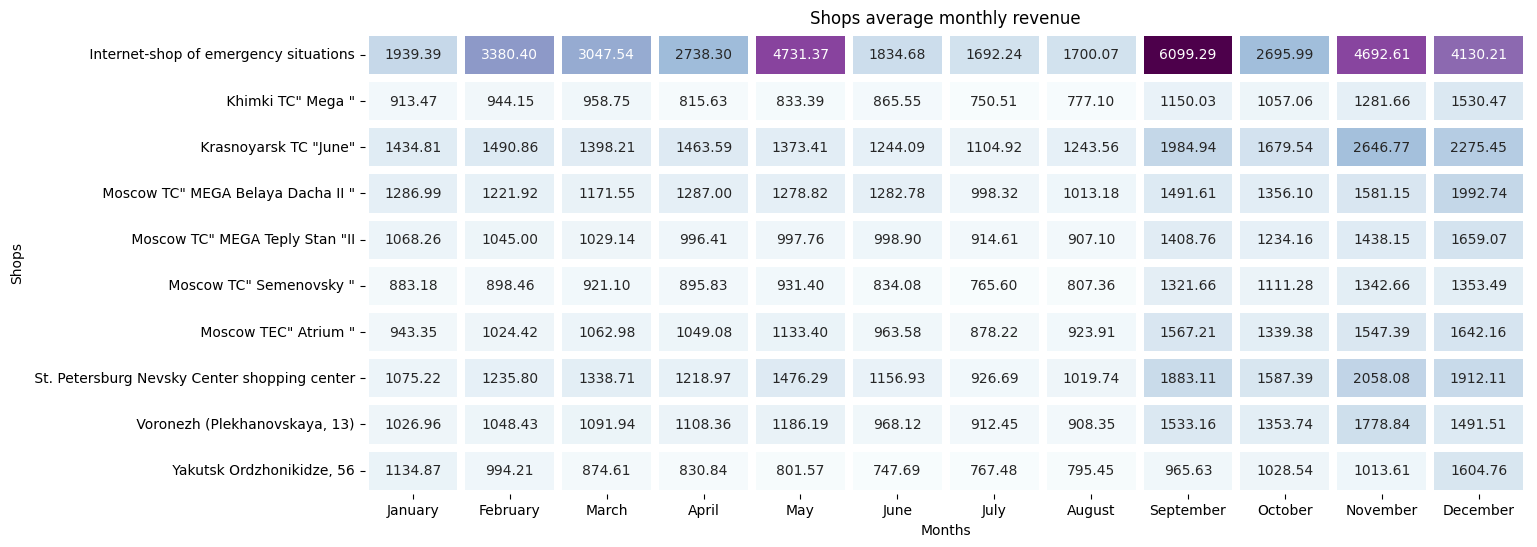

In [24]:
fig = plt.figure(figsize=(15,6))

sns.heatmap(m_revenue_shop, annot=True, linewidths=5.5, cbar=False, fmt='.2f', cmap='BuPu')

plt.xlabel('Months')
plt.ylabel('Shops')

plt.title('Shops average monthly revenue')

None

### Задание 6.

Изобразите графики из заданий 1, 3 и 4 на одном пространстве, используя `plt.subplots()`.

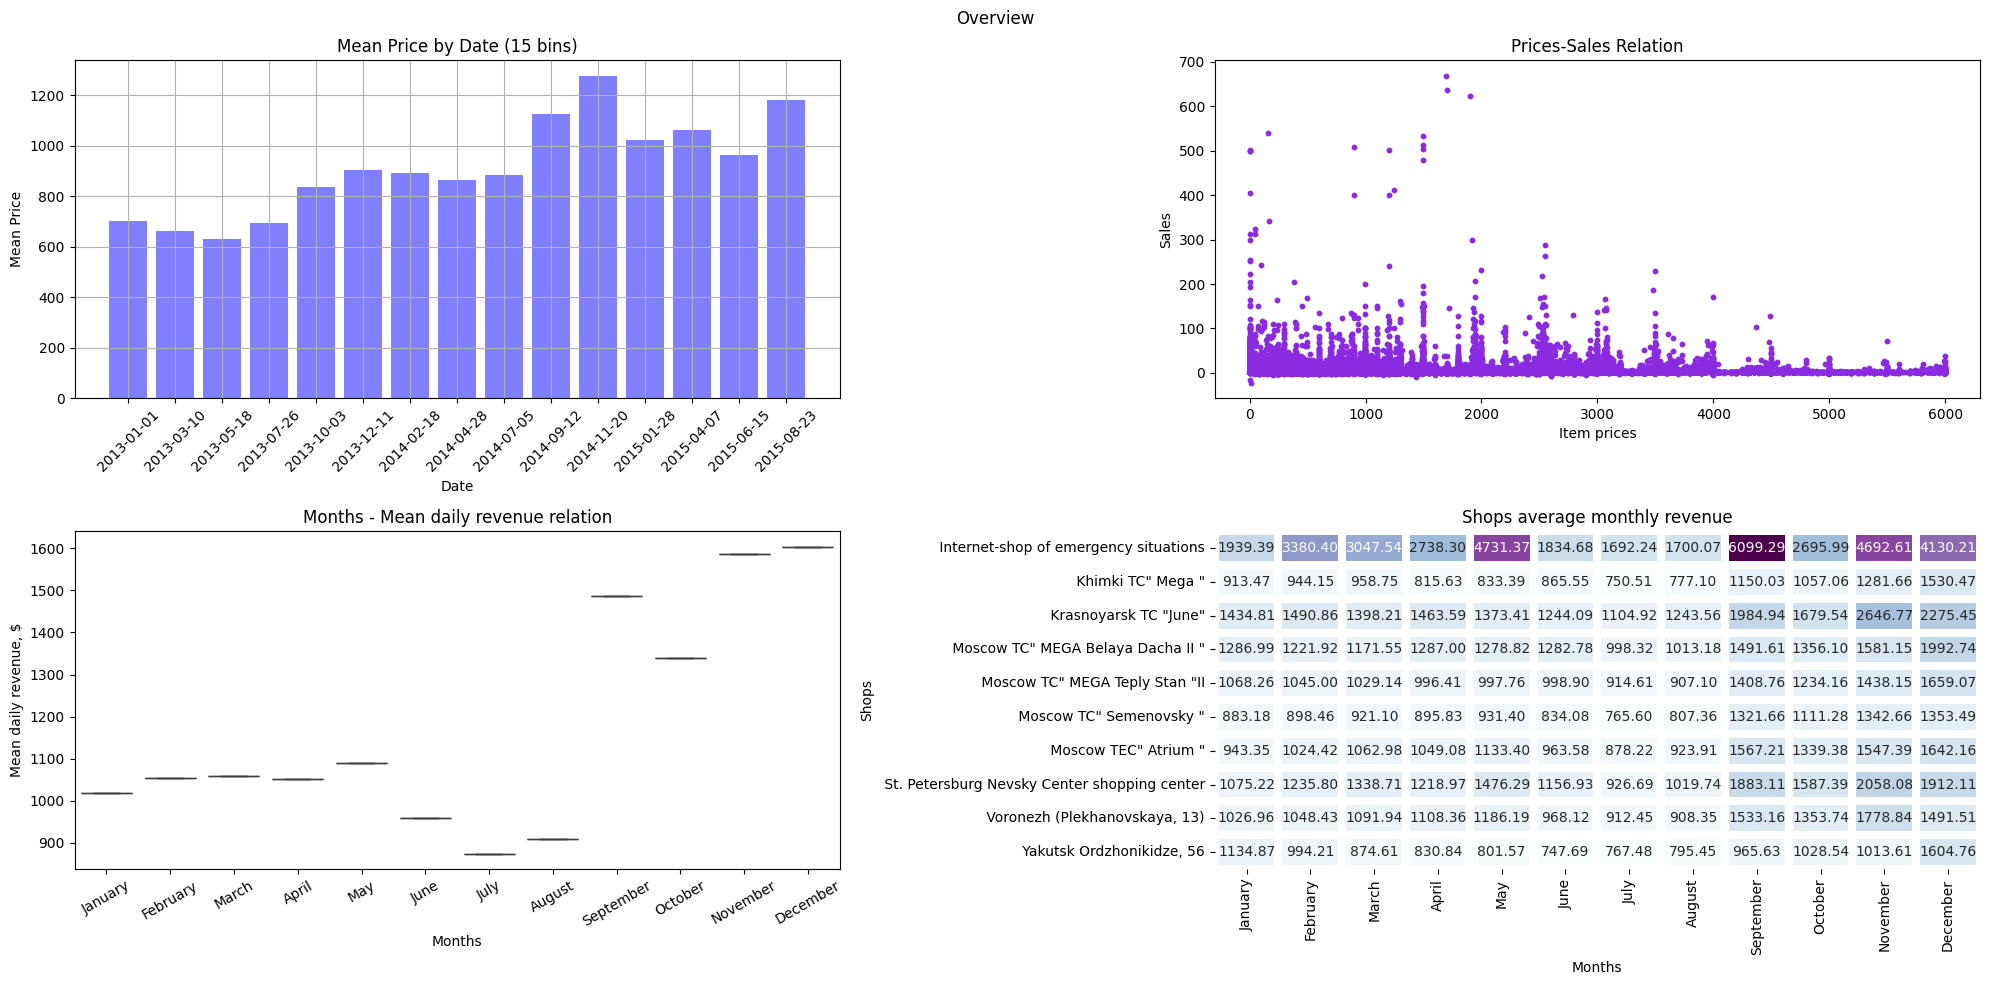

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))

plt.suptitle('Overview')

# Plot the bar plot in the first subplot
ax[0, 0].bar(bin_labels, mean_price_by_date.values, color='blue', alpha=0.5)
ax[0, 0].set_xlabel('Date')
ax[0, 0].set_ylabel('Mean Price')
ax[0, 0].set_title('Mean Price by Date (15 bins)')
ax[0, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
ax[0, 0].grid(True)

ax[0, 1].scatter(x=filter_data['item_price'], y=filter_data['item_cnt_day'], color='#8A2BE2', s=10)
ax[0, 1].set_xlabel('Item prices')
ax[0, 1].set_ylabel('Sales')
ax[0, 1].set_title('Prices-Sales Relation')

sns.boxplot(x=m_revenue.index, y=m_revenue['rev'], ax=ax[1, 0])
ax[1, 0].set_xlabel('Months')
ax[1, 0].set_ylabel('Mean daily revenue, $')
ax[1, 0].set_title('Months - Mean daily revenue relation')
ax[1, 0].tick_params(axis='x', rotation=30)  # Rotate x-axis labels for better readability

sns.heatmap(m_revenue_shop, annot=True, linewidths=5.5, cbar=False, fmt='.2f', cmap='BuPu', ax=ax[1, 1])
ax[1, 1].set_xlabel('Months')
ax[1, 1].set_ylabel('Shops')
ax[1, 1].set_title('Shops average monthly revenue')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

None

------------

Теперь же обратимся к данным о ценах какого-либо актива (на ваш выбор), для которого есть тикер на **[Yahoo Finance](https://finance.yahoo.com)**, и поработаем с временными рядами. Не берите слишком большой интервал наблюдений, чтобы график был более читабельным.

In [26]:
aapl = yf.Ticker("AAPL").history(start="2022-01-01").reset_index()
aapl['Date'] = pd.to_datetime(aapl['Date'].dt.date)
aapl.set_index('Date', inplace=True)

In [27]:
aapl.sample(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-10-24,145.943216,148.957458,144.763293,148.184067,75981900,0.00,0.0
2023-02-10,148.666478,150.536486,148.427747,150.208237,57450700,0.23,0.0
2023-09-25,173.749083,176.511917,173.699210,175.624222,46172700,0.00,0.0


### Задание 7.

Изобразите график динамики цены закрытия для актива.

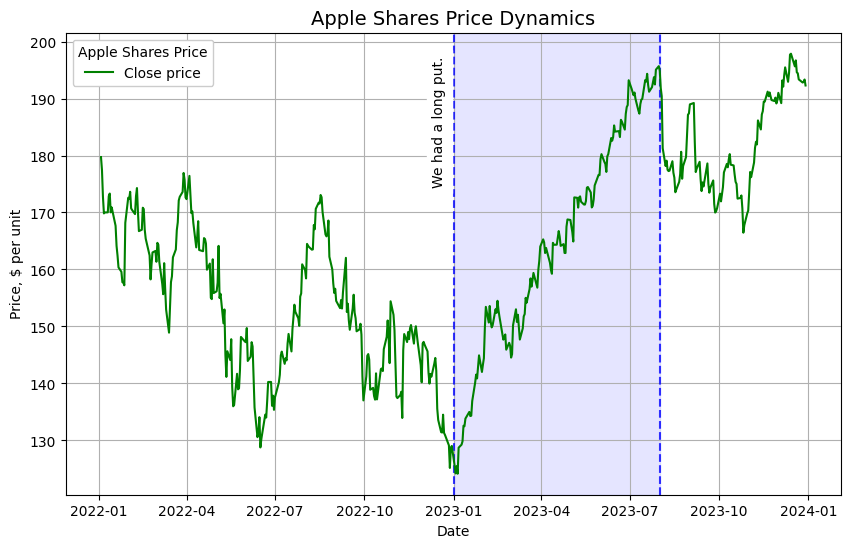

In [28]:
import datetime

fig = plt.figure(figsize=(10,6))

start = '2022-01-01'
end = '2024-01-01'

plt.axvline(x=datetime.date(2023, 1, 1), color='blue', linestyle='dashed', alpha=0.8)
plt.axvline(x=datetime.date(2023, 8, 1), color='blue', linestyle='dashed', alpha=0.8)

plt.axvspan(xmin=datetime.date(2023, 1, 1), xmax=datetime.date(2023, 8, 1), alpha=0.1, color='blue')

plt.plot(aapl['Close'][start:end], label='Close price', color='green')

plt.legend(title='Apple Shares Price', framealpha=1)

plt.title('Apple Shares Price Dynamics', fontsize=14)

plt.xlabel('Date')
plt.ylabel('Price, $ per unit')

plt.text(x=datetime.date(2022, 12, 10), y=175, s='We had a long put.', rotation=90, bbox=dict(color='white'), color='black')

plt.grid()

None

### Задание 8.

К предыдущему графику добавьте кривые скользящего среднего цены закрытия актива с длиной скользящего окна 50, 100 и 250.

In [29]:
aapl['Close_EWMA50'] = aapl['Close'].ewm(alpha=0.2, min_periods=50).mean()
aapl['Close_EWMA100'] = aapl['Close'].ewm(alpha=0.2, min_periods=100).mean()
aapl['Close_EWMA250'] = aapl['Close'].ewm(alpha=0.2, min_periods=250).mean()

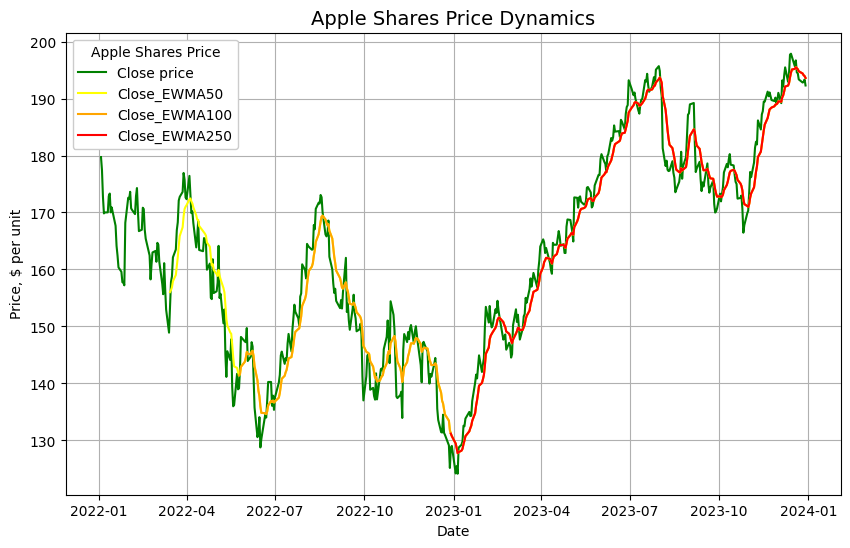

In [30]:
fig = plt.figure(figsize=(10,6))

start = '2022-01-01'
end = '2024-01-01'

plt.plot(aapl['Close'][start:end], label='Close price', color='green')
plt.plot(aapl['Close_EWMA50'][start:end], label='Close_EWMA50', color='yellow')
plt.plot(aapl['Close_EWMA100'][start:end], label='Close_EWMA100', color='orange')
plt.plot(aapl['Close_EWMA250'][start:end], label='Close_EWMA250', color='red')

plt.legend(title='Apple Shares Price', framealpha=1)

plt.title('Apple Shares Price Dynamics', fontsize=14)

plt.xlabel('Date')
plt.ylabel('Price, $ per unit')

plt.grid()

None

### Задание 9.

Изобразите график динамики цен звкрытия для актива. Кроме того, изобразите "коридор" высотой в 4 стандартных отклонения (2 вверх и 2 вниз) значения цены закрытия актива со скользящим окном длины 50. Заполните пространство между верхней и нижней границами каким-то цветом (не забудьте понизить значение аргумента `alpha`).

Референс:

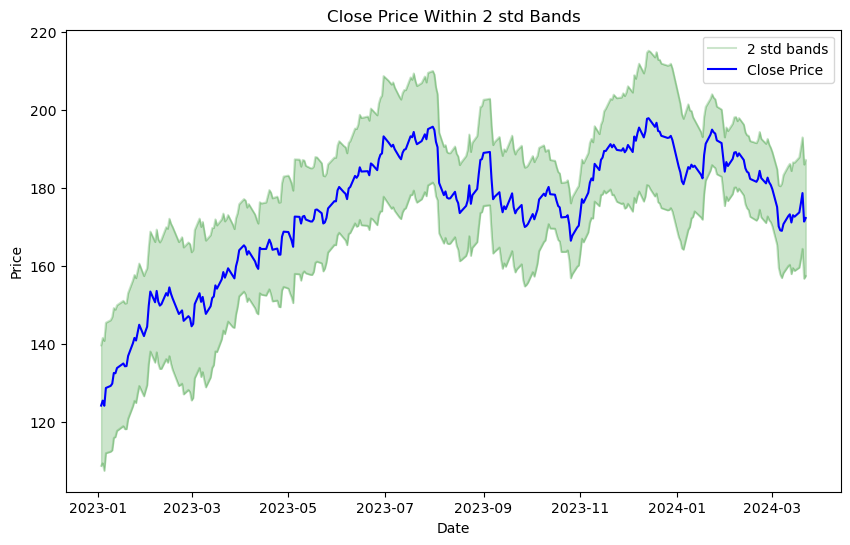

In [31]:
aapl['h_EWMA50'] = aapl['Close'] + 1.96*aapl['Close_EWMA50'].std()
aapl['l_EWMA50'] = aapl['Close'] - 1.96*aapl['Close_EWMA50'].std()
aapl.loc[:, ['h_EWMA50', 'l_EWMA50']].sample(3)

,h_EWMA50,l_EWMA50
Date,,
2022-03-28,209.452695,137.779239
2023-01-18,170.123822,98.450366
2023-10-03,207.790478,136.117023


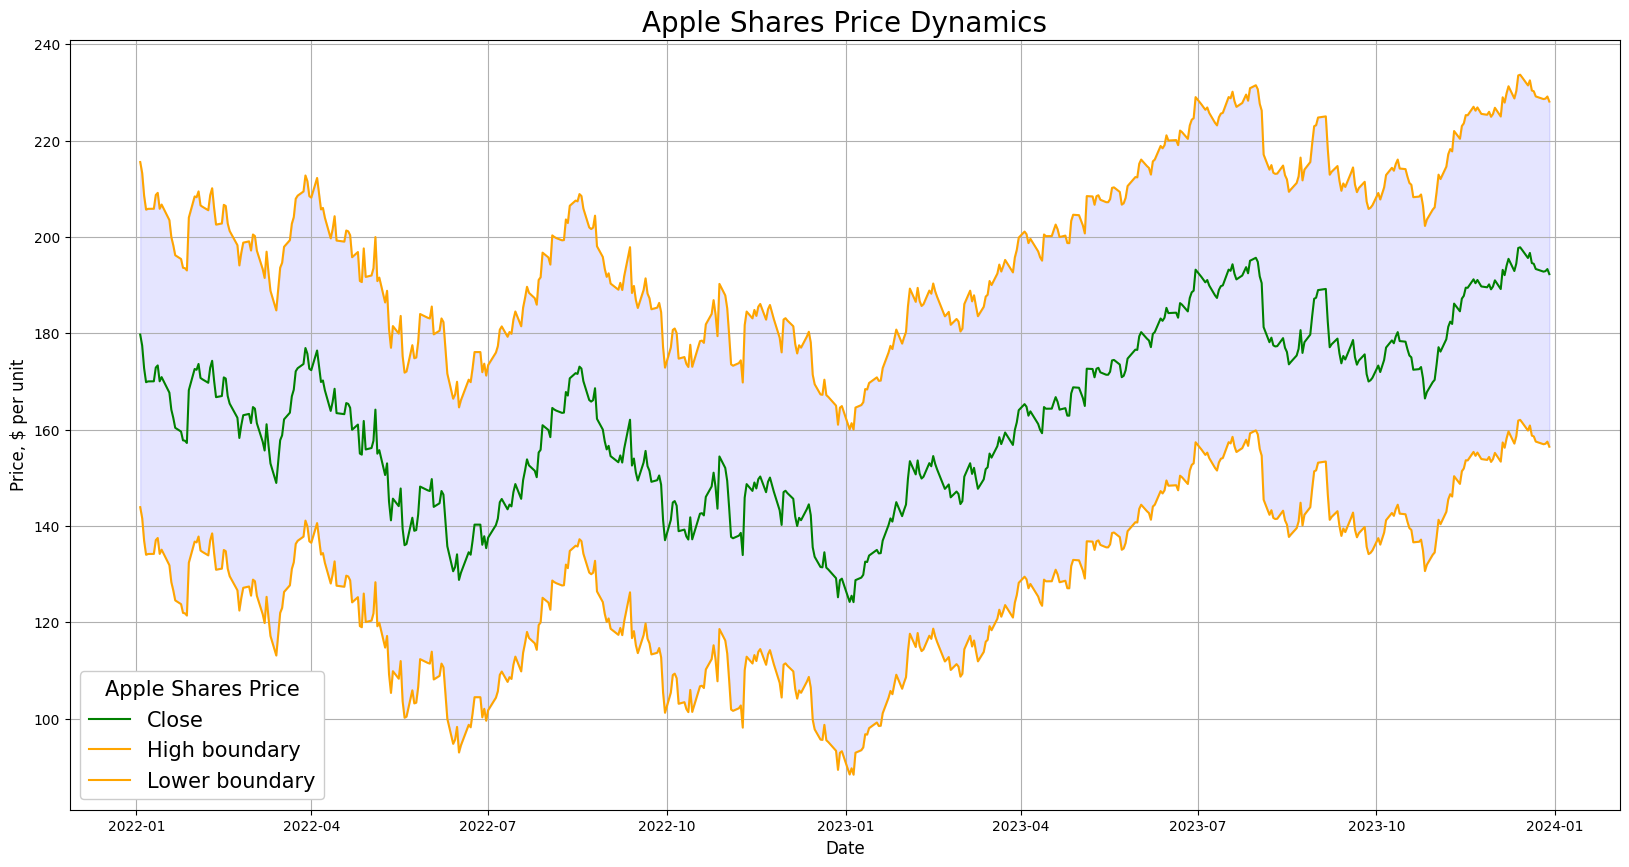

In [32]:
fig = plt.figure(figsize=(20,10))

start = '2022-01-01'
end = '2024-01-01'

plt.plot(aapl['Close'][start:end], label='Close', color='green')
plt.plot(aapl['h_EWMA50'][start:end], label='High boundary', color='orange')
plt.plot(aapl['l_EWMA50'][start:end], label='Lower boundary', color='orange')

# Fill the area between the 'h_EWMA50' and 'l_EWMA50' lines
mask = (aapl.index >= start) & (aapl.index <= end)
plt.fill_between(aapl.index[mask],
                 aapl['h_EWMA50'][mask], aapl['l_EWMA50'][mask], color='blue', alpha=0.1)

plt.legend(title='Apple Shares Price', framealpha=1, fontsize=15, title_fontsize = 15)

plt.title('Apple Shares Price Dynamics', fontsize=20)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Price, $ per unit', fontsize=12)

plt.grid()

None

### Задание 10.

Проверьте автокоррелированность вашего временного ряда.

In [33]:
from statsmodels.graphics.tsaplots import plot_acf

<Figure size 2000x1000 with 0 Axes>

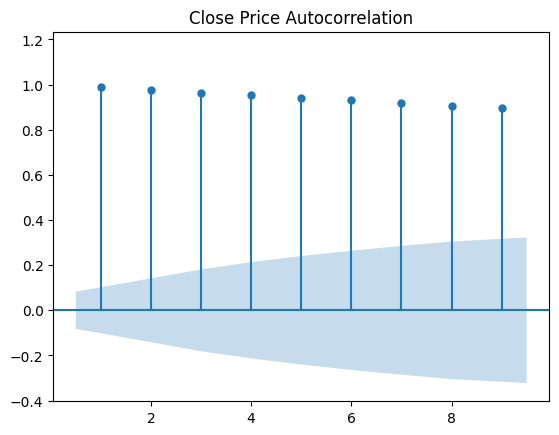

In [34]:
fig = plt.figure(figsize=(20,10))
plot_acf(aapl['Close'],
    lags=np.arange(1,10), auto_ylims=True, title='Close Price Autocorrelation')

None

All the ACF lagged are significant - so, there is autocorrelation. But it's the close price for shares - according to financial theory it is a random walk process - thus, automatically autocorrelated.